###  Luis Ricardo Cruz García
#### Procesamiento de Lenguaje Natural (NLP)

#### Tarea 1

In [1]:
import re
import os
import glob
import nltk
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
# create directory to store the text of each conf.
# os.mkdir("../Data/estenograficas_limpias")

In [3]:
for file_path in glob.glob("../../Data/estenograficas/*"):
    file_name = re.findall(r"(\d\d\d\d-\d\d-\d\d)", file_path)[0]
    with open(file_path) as f:
        f_soup = BeautifulSoup(f.read(), "html.parser")

        # remove "\n", "\t", "\s".
        f_clean_text = re.sub(r"[\n\t\s]+", " ", f_soup.get_text())

        # remove undesired occurrences of "covid","coronavirus" in the html of every conference.
        f_clean_text = re.sub(r"Cenapred Becas.+?by ThemeMakers", "", f_clean_text)
        f_clean_text = re.sub(r"\d\d\.\d\d\.\d\d.+?\d\d\.\d\d\.\d\d", "", f_clean_text)
        
        # write clean text to a new file in "estenograficas_limpias" folder with the same name
        with open("../../Data/estenograficas_limpias/" + file_name + ".txt", "x") as clean_f:
            clean_f.write(f_clean_text)

# 2.- Vistazo a los datos

1. Cargue todas las donferencias en un string y aplique la función split para generar los tokents fácilmente.

In [3]:
conferences_str = ""

for file in glob.glob("../../Data/estenograficas_limpias/*"):
	conferences_str += open(file).read()

In [7]:
conferences_tokens = conferences_str.split()

2. Contar la cantidad de palabras en todas las conferencias.

In [8]:
print(f"{len(conferences_tokens) = }")

len(conferences_tokens) = 6856927


3. Extraer el vocabulario y mostrar su longitud.

In [9]:
vocabulary = list(set(conferences_tokens))
print(f"{len(vocabulary) = }")

len(vocabulary) = 157389


4. Mida la riqueza del vocabulario de alguna forma en todos los documentos.

In [10]:
print(f"{len(conferences_tokens) / len(vocabulary) = }")

len(conferences_tokens) / len(vocabulary) = 43.56674862919264


5. Haga lo mismo que los 4 puntos anteriores pero con todo el texto en minúsculas. Vea las diferencias y comente brevemente.

In [11]:
conferences_lower_str = conferences_str.lower()
conferences_lower_tokens = conferences_lower_str.split()
print(f"{len(conferences_lower_tokens) = }")
vocabulary_lower = list(set(conferences_lower_tokens))
print(f"{len(vocabulary_lower) = }")
print(f"{len(conferences_lower_tokens) / len(vocabulary_lower) = }")

len(conferences_lower_tokens) = 6856927
len(vocabulary_lower) = 145208
len(conferences_lower_tokens) / len(vocabulary_lower) = 47.22141342074817


6. Haga lo mismo que los puntos 1, 2 y 3 usando el tokenizador RegExp de NLTK, con una expresión regular que trate de sacar solo tokens que pueden contener solo letras mayúsculas y minúsculas. Después cargue los tokens en un objeto Text de NLTK en lugar de una lista de Python.

In [10]:
from nltk.tokenize import RegexpTokenizer

regex_tknzr = RegexpTokenizer(r"[A-Za-z]+")

In [11]:
conferences_tokens_regex = regex_tknzr.tokenize(conferences_str)

print(f"{len(conferences_tokens_regex) = }")
vocabulary_regex = set(conferences_tokens_regex)
print(f"{len(vocabulary_regex) = }")

len(conferences_tokens_regex) = 7399925
len(vocabulary_regex) = 65462


7. Haga todo el texto minúsculas. Haga los mismo que los puntos 1, 2, y 3 usando el tokenizador TweetTokenizer. Haga el resto de esta tarea asumiendo haber hecho este punto.

In [12]:
from nltk.tokenize import TweetTokenizer

tweet_tknzr = TweetTokenizer()

In [13]:
conferences_tokens_tweet = tweet_tknzr.tokenize(conferences_lower_str)

print(f"{len(conferences_tokens_tweet) = }")
vocabulary_tweet = set(conferences_tokens_tweet)
print(f"{len(vocabulary_tweet) = }")

len(conferences_tokens_tweet) = 7913397
len(vocabulary_tweet) = 66991


# 3.- Funciones NLTK

In [14]:
conferences_text = nltk.Text(conferences_tokens_tweet)

1. Use la función `concordance` para ver el contexto de 5 palabras que usted elija.

In [15]:
words = ["tren", "corrupción", "morena", "gatell", "narcotráfico"]

for w in words:
	conferences_text.concordance(w)

Displaying 25 of 1706 matches:
a nacional en tlaxcala al asaltar un tren de carga ; y también este fin de sem
laxcala porque se pretendía robar un tren , saquear unos vagones de un tren ; 
un tren , saquear unos vagones de un tren ; y los delincuentes , que encabezab
evistos . baste poner el ejemplo del tren toluca-ciudad de méxico , que se est
ene que salir de aquí , de méxico en tren y lo van siguiendo , bloquean las ví
o desde allá y ya no puede seguir en tren a veracruz y sigue hacia la costa a 
 conferencia , vamos a supervisar el tren toluca-ciudad de méxico , el avance 
iendo oportunidad de trabajo , en el tren maya , en el istmo , en la refinería
video ) ( inicia video ) voz mujer : tren maya , reporte de avances . semana 3
trimonio arqueológico en la ruta del tren maya . al día de hoy hemos estableci
dos por los cinco tramos en obra del tren maya ascienden a 69 mil 63 . el tren
tren maya ascienden a 69 mil 63 . el tren maya avanza . ( finaliza video ) ( i
eo ) ( inicia video c

2. Elija una palabra que le parezca interesante y muestre palabras con uso similar. Muestre también los contextos comunes.

In [16]:
interesting_word = "neoliberal"
conferences_text.similar(interesting_word)

y que de es pero no porque en entonces ya económica exterior también
anterior del como o para si pues


3. Haciendo uso de alguna librerı́a de Python: organice todos los archivos de las conferencias desde la más antigua hasta la más nueva (echando mano del nombre de los archivos y fechas), y cárguelos en un objeto `Text` para generar un dispersion plot de las siguientes palabras: "prian", "corrupción", "mafia", "narco", "gasolina", "pipas", "conacyt", "ciencia", "turismo", "pandemia", "coronavirus", "covid", "delta", "omicron", "vacuna", "vacunación" y otras tres palabras de su elección.

In [2]:
# using the file name format "yyyy-mm-dd.txt" to sort the files in estenograficas_limpias folder
conferences_inorder = sorted(glob.glob("../../Data/estenograficas_limpias/*"))

In [18]:
conferences_inorder_str = ""

for file in conferences_inorder:
	conferences_inorder_str += open(file).read()

In [19]:
conferences_inorder_str = conferences_inorder_str.lower()
conferences_inorder_tokens = tweet_tknzr.tokenize(conferences_inorder_str)
conferences_inorder_text = nltk.Text(conferences_inorder_tokens)

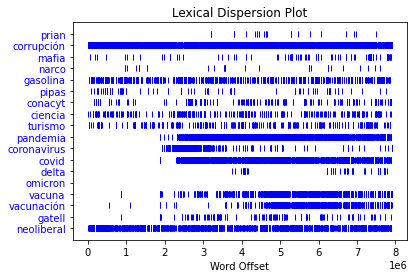

In [20]:
conferences_inorder_text.dispersion_plot(
	["prian", "corrupción", "mafia", "narco", "gasolina", "pipas", "conacyt", "ciencia", "turismo", "pandemia", "coronavirus", "covid", "delta", "omicron", "vacuna", "vacunación", "gatell", "neoliberal"]
)

4. Muestre $50$ colocaciones de todo el corpus.

In [21]:
conferences_text.collocations(50)

lópez obrador; andrés manuel; manuel lópez; presidente andrés; por
ciento; estados unidos; buenos días; señor presidente; todos los;
versión estenográfica; nada más; muchas gracias; por eso; guardia
nacional; desde luego; prensa matutina; adultos mayores; mil millones;
marcelo ebrard; por ejemplo; todas las; baja california; muy
importante; sin embargo; derechos humanos; quintana roo; sobre todo;
creo que; nuestro país; que que; por qué; tiene que; muy bien; los
trabajadores; para que; documentosdocumentos gabinetegabinete;
gabinetegabinete enlaces; tren maya; hugo lópez-gatell; ver con;
comisión federal; que nos; gobierno federal; interés aprende; mucho
gusto; este año; home versión; poder judicial; matutina sala; del
gobierno


5. Muestre un histograma de longitud en caracteres de las palabras. Muestre en el histograma el top $5$ de longitudes más largas.

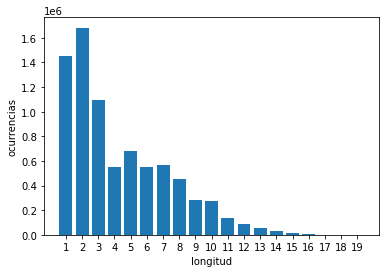

In [22]:
len_per_word = [len(w) for w in conferences_text]
occurrences = [len_per_word.count(i) for i in range(1, 20)]

plt.bar(range(1, 20), occurrences)
plt.xticks(range(1, 20))
plt.xlabel("longitud")
plt.ylabel("ocurrencias")
plt.show()

In [23]:
# pairs (occurences, length)
occ_len = list(zip(occurrences, list(range(1, 20))))
occ_len.sort(reverse=True)

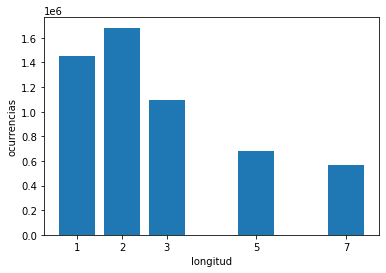

In [24]:
# Graph of the five most occurring lengths.
plt.bar([occ_len[i][1] for i in range(5)], [occ_len[i][0] for i in range(5)])
plt.xticks([occ_len[i][1] for i in range(5)])
plt.xlabel("longitud")
plt.ylabel("ocurrencias")
plt.show()

6. Muestre $50$ palabras con longitud mayor a $8$ caracteres y frecuencia mayor a $5$ en todo el texto usando list-comprenhension de python.

In [25]:
from nltk import FreqDist

In [26]:
fdist = FreqDist(conferences_text)
print([w for w in set(conferences_text) if len(w) > 8 and fdist[w] > 5][:50])

['organismos', 'formulación', 'detallado', 'relacionan', 'gravísimo', 'pfizer-biontech', 'subutilizados', 'mosquitos', 'definitivo', 'dispersamos', 'comentándoles', 'despidieron', 'remodelar', 'consejera', 'llegáramos', 'endeudados', 'chantajes', 'simbólico', 'inmensamente', 'portación', 'promovido', 'especializados', 'sucedieron', 'aprendieron', 'jovencitos', 'contratado', 'coberturas', 'departamentales', 'cardiacos', 'carísimos', 'encuentra', 'fuertísimo', 'coordinadoras', 'tamaulipas', 'videojuegos', 'monitoreo', 'troncales', 'recibidos', 'exsecretaria', 'fracturas', 'barlovento', 'coincidentemente', 'comprobación', 'automotores', 'entregado', 'sustancia', 'acuíferos', 'especular', 'paternalismo', 'barredoras']


7. Ver [https://www.nltk.org/book/ch02.html](https://www.nltk.org/book/ch02.html) en la sección $1.5$. Proponga una gráfica usando ConditionalFreqDist como la de la Sección $1.5$ para estos datos. Usted elige las palabras.

In [3]:
str_conf = []

for i, file in enumerate(conferences_inorder):
	str_conf.append(open(file).read().lower().split())

In [4]:
cfd2 = nltk.ConditionalFreqDist(
			(target, re.findall(r"\d\d\d\d\-\d\d\-\d\d", date)[0])
			for i, date in enumerate(conferences_inorder)
				for w in str_conf[i]
					for target in ['covid', 'vacuna']
						if w.startswith(target))

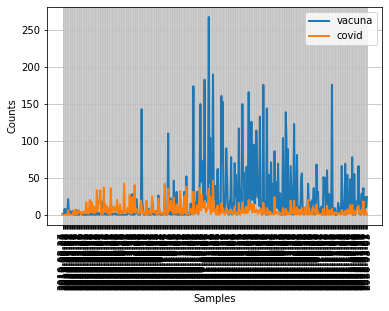

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [5]:
cfd2.plot()

8. Use la lista de stopwords de nltk y obtenga la cantidad de palabras en los datos con y sin stopwords.

In [30]:
from nltk.corpus import stopwords

In [31]:
# set of stop words to reduce computation time
set_stopwords = set(stopwords.words('spanish'))

conferences_tokens_no_sw = [w for w in conferences_tokens_tweet if w not in set_stopwords]

In [32]:
print(f"{len(conferences_tokens_no_sw) = }")

len(conferences_tokens_no_sw) = 4388196


In [33]:
print(len(set(conferences_tokens_no_sw)))

66726


9. Muestre las 300 palabras más frecuentes en las conferencias, sin tomar en cuenta stopwords. Muéstrelas de la más frecuente a la menos frecuente.

In [34]:
fdist.most_common(300)

[(',', 619621),
 ('de', 380666),
 ('que', 269897),
 ('.', 255236),
 ('la', 221484),
 ('a', 185612),
 ('y', 178233),
 ('el', 177966),
 ('en', 176432),
 ('se', 123752),
 ('los', 105080),
 ('no', 96976),
 ('es', 92910),
 ('lo', 66451),
 ('con', 64920),
 ('para', 62559),
 ('por', 60948),
 ('las', 58894),
 ('un', 58818),
 ('del', 58779),
 (':', 54273),
 ('una', 45218),
 ('presidente', 40935),
 ('ya', 38966),
 ('porque', 33677),
 ('más', 33062),
 ('pero', 31490),
 ('al', 31125),
 ('¿', 30097),
 ('?', 30042),
 ('hay', 28656),
 ('como', 27907),
 ('también', 26595),
 ('eso', 25333),
 ('este', 24978),
 ('está', 24765),
 ('si', 24004),
 ('o', 22585),
 ('vamos', 21997),
 ('va', 21793),
 ('entonces', 21304),
 (';', 20912),
 ('nos', 20691),
 ('lópez', 20549),
 ('manuel', 20285),
 ('obrador', 19992),
 ('mil', 19840),
 ('andrés', 19834),
 ('muy', 19318),
 ('méxico', 19003),
 ('todo', 18995),
 ('todos', 18084),
 ('su', 17944),
 ('son', 17649),
 ('tiene', 16787),
 ('esta', 16694),
 ('esto', 16431),
 ('e

In [35]:
fdist_no_stopwords = nltk.FreqDist(w for w in conferences_text if w not in set_stopwords)

In [36]:
fdist_no_stopwords.most_common(300)

[(',', 619621),
 ('.', 255236),
 (':', 54273),
 ('presidente', 40935),
 ('¿', 30097),
 ('?', 30042),
 ('si', 24004),
 ('vamos', 21997),
 ('va', 21793),
 ('entonces', 21304),
 (';', 20912),
 ('lópez', 20549),
 ('manuel', 20285),
 ('obrador', 19992),
 ('mil', 19840),
 ('andrés', 19834),
 ('méxico', 19003),
 ('aquí', 14935),
 ('gobierno', 13980),
 ('-', 12801),
 ('ahora', 11800),
 ('dos', 10724),
 ('ver', 10279),
 ('país', 9883),
 ('millones', 9858),
 ('nacional', 9582),
 ('caso', 9580),
 ('pues', 9202),
 ('van', 9094),
 ('ahí', 9066),
 ('cómo', 9004),
 ('pesos', 8945),
 ('pueblo', 8791),
 ('días', 8782),
 ('bueno', 8732),
 ('ser', 8706),
 ('así', 8666),
 ('hacer', 8618),
 ('pregunta', 8546),
 ('salud', 8441),
 ('‘', 8290),
 ('gente', 8151),
 ('usted', 8044),
 ('señor', 7810),
 ('’', 7771),
 ('año', 7676),
 ('ciento', 7562),
 ('gracias', 7510),
 ('bien', 7283),
 ('…', 7269),
 ('importante', 7180),
 ('tener', 7082),
 ('decir', 7063),
 ('manera', 7012),
 ('años', 6955),
 ('tres', 6794),
 ('

# 4 Otras librerías en Python

1. Mencione dos librerı́as en Python además de NLTK para NLP. Ponga una desventaja y ventaja de cada una.

- [CoreNLP](https://stanfordnlp.github.io/CoreNLP/), escrito en java (desventaja), se puede usar con python a través de una interface (ventaja).

- [spaCy](https://spacy.io/), open-source (ventaja), no es customizable (al parecer, es difícil modificar los modelos ya hechos)(desventaja).

2. Mencione tres alternativas para Text Processing en NLP qué existen en otros lenguajes. De una ventaja y desventaja de cada una.

- [GATE](https://gate.ac.uk/), biblioteca de C++, código más difícil de leer-escribir (desventaja), rápido (ventaja).
- [CoreNLP](https://stanfordnlp.github.io/CoreNLP/), desarrollado para ser usado con Java (ventaja y desventaja a la vez).
- [freeling](https://nlp.lsi.upc.edu/freeling/), biblioteca de C++, código más difícil de leer-escribir (desventaja), rápido (ventaja).